# Yelp Data Challenge - Restaurant Recommender

BitTiger DS501

Nov 2017

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use("ggplot")

In [2]:
df = pd.read_csv('dataset/last_1_years_restaurant_reviews.csv')

In [3]:
df.head()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2017-02-14,0,Xp3ppynEvVu1KxDHQ3ae8w,5,Delmonico Steakhouse is a steakhouse owned by ...,0,KC8H7qTZVPIEnanw9fG43g
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,1,2017-05-28,0,LEzphAnz0vKE32PUCbjLgQ,4,One of the top steak places I've had in Vegas ...,2,3RTesI_MAwct13LWm4rhLw
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2017-08-25,0,4e-cxYVdlIu2ZDxVJqUfOQ,5,This place is superb from the customer service...,0,EAOt1UQhJD0GG3l_jv7rWA
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,1,2017-02-12,1,heZd0W3HuPJxZBrCYD3wDw,2,"Lousy steak. \n\nThe service was great - Todd,...",3,OtKA03ALQQ1CBhtaJod_Jw
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2017-12-10,0,exzXjy7Y2ICX_BEVTDWpJA,5,I got the filet mignon with seared foigras and...,0,Ymtd4cQypep_QZJ-qJsHuA


## 1. Clean data and get rating data 

#### Select relevant columns in the original dataframe

In [4]:
# Get business_id, user_id, stars for recommender

df_rec = df[['business_id', 'user_id', 'stars']]
df_rec.head()

,business_id,user_id,stars
0,--9e1ONYQuAa-CB_Rrw7Tw,KC8H7qTZVPIEnanw9fG43g,5
1,--9e1ONYQuAa-CB_Rrw7Tw,3RTesI_MAwct13LWm4rhLw,4
2,--9e1ONYQuAa-CB_Rrw7Tw,EAOt1UQhJD0GG3l_jv7rWA,5
3,--9e1ONYQuAa-CB_Rrw7Tw,OtKA03ALQQ1CBhtaJod_Jw,2
4,--9e1ONYQuAa-CB_Rrw7Tw,Ymtd4cQypep_QZJ-qJsHuA,5


In [5]:
df_rec['stars'].value_counts()

5    83329
4    33537
1    22348
3    17546
2    13157
Name: stars, dtype: int64

In [6]:
df_user_count = df_rec['user_id'].value_counts()
df_user_count.head()
df_user_count.sum()

169917

In [7]:
df_user_count.index

Index([u'bLbSNkLggFnqwNNzzq-Ijw', u'JaqcCU3nxReTW2cBLHounA',
       u'YE54kKTuqJJPNYWIKIpOEQ', u'keBv05MsMFBd0Hu98vXThQ',
       u'P0rGN5mDue55uIiAzkrRlw', u'U4INQZOPSUaj8hMjLlZ3KA',
       u'bvzwsK8u5i0Kvvyfy7aT1Q', u'OXSJCjKtvZPf-YPDCXcWZg',
       u'8dxkcmAXY4ttrVFD1GhbdQ', u'sCelgwFoaNLMC_A7Y8usCw',
       ...
       u'Wh5DF9NfhhQzgGNIyhxDAA', u'DTL1ZIqnXlxE5gwWWLi8qw',
       u'EXLQpXJDGmcN-7_douwqZw', u'Rpqj6raY0tgxQuyu16NG2Q',
       u'Md5L1KjZfxTgVgq_Ions5A', u'uV74b2fN1xBkQVPHaY51CQ',
       u'aWJRNycIBB9rXqUniSAA9w', u'7KYnhbHu1Rr2HzFhFLGXxg',
       u'ekfX9Zb5VPYCIG-DAvQSWg', u'GIaCC4TfsHufCa66YW57Pg'],
      dtype='object', length=92274)

In [8]:
df_user_count.describe()

count    92274.000000
mean         1.841440
std          2.670796
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        156.000000
Name: user_id, dtype: float64

In [9]:
len([value for value in df_user_count if value == 1])

63971

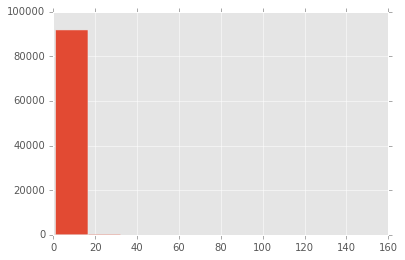

In [10]:
df_user_count.hist()
plt.show()

We can see the data is highly skewed - most people give only a few reviews.  So we take log transform to data.

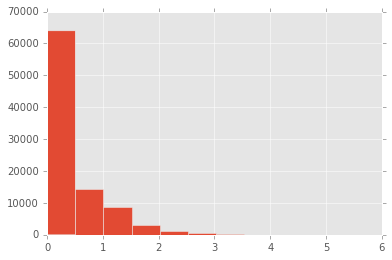

In [11]:
df_user_count.apply(np.log).hist()
plt.show()

#### There are many users that haven't given many reviews, exclude these users from the item-item similarity recommender

**Q**: How do we recommend to these users anyways?

In [12]:
# To be implemented
# users comment over 3 times
df_users = df_user_count[df_user_count > 3]
df_users.head()

bLbSNkLggFnqwNNzzq-Ijw    156
JaqcCU3nxReTW2cBLHounA    100
YE54kKTuqJJPNYWIKIpOEQ     86
keBv05MsMFBd0Hu98vXThQ     82
P0rGN5mDue55uIiAzkrRlw     82
Name: user_id, dtype: int64

In [13]:
df_rec.set_index('user_id').head()

,business_id,stars
user_id,,
KC8H7qTZVPIEnanw9fG43g,--9e1ONYQuAa-CB_Rrw7Tw,5
3RTesI_MAwct13LWm4rhLw,--9e1ONYQuAa-CB_Rrw7Tw,4
EAOt1UQhJD0GG3l_jv7rWA,--9e1ONYQuAa-CB_Rrw7Tw,5
OtKA03ALQQ1CBhtaJod_Jw,--9e1ONYQuAa-CB_Rrw7Tw,2
Ymtd4cQypep_QZJ-qJsHuA,--9e1ONYQuAa-CB_Rrw7Tw,5


In [14]:
df_rec.set_index('user_id').loc[df_users.index].head()

,business_id,stars
user_id,,
bLbSNkLggFnqwNNzzq-Ijw,-WLrZPzjKfrftLWaCi1QZQ,4
bLbSNkLggFnqwNNzzq-Ijw,0G83H_zoum-Q4bWU2olTqQ,4
bLbSNkLggFnqwNNzzq-Ijw,0i9S0BejjRv0ZDwdO9XymA,3
bLbSNkLggFnqwNNzzq-Ijw,0wW9PasC8pw8SY7rlY3ZKw,4
bLbSNkLggFnqwNNzzq-Ijw,1CaM8eIvl41l4f3V-V-cAw,4


In [15]:
df_rec_users = df_rec.set_index('user_id').loc[df_users.index].reset_index()

In [16]:
df_rec_users.head()

,user_id,business_id,stars
0,bLbSNkLggFnqwNNzzq-Ijw,-WLrZPzjKfrftLWaCi1QZQ,4
1,bLbSNkLggFnqwNNzzq-Ijw,0G83H_zoum-Q4bWU2olTqQ,4
2,bLbSNkLggFnqwNNzzq-Ijw,0i9S0BejjRv0ZDwdO9XymA,3
3,bLbSNkLggFnqwNNzzq-Ijw,0wW9PasC8pw8SY7rlY3ZKw,4
4,bLbSNkLggFnqwNNzzq-Ijw,1CaM8eIvl41l4f3V-V-cAw,4


#### Create utility matrix from records

In [17]:
# To be implemented
df_utility = pd.pivot_table(data=df_rec_users,
                            values='stars', # fill with stars
                            index='user_id', # rows
                            columns='business_id', # columns
                            fill_value=0) # fill missings

In [18]:
df_utility.head()

business_id,--9e1ONYQuAa-CB_Rrw7Tw,-1m9o3vGRA8IBPNvNqKLmA,-3zffZUHoY8bQjGfPSoBKQ,-8R_-EkGpUhBk55K9Dd4mg,-9YyInW1wapzdNZrhQJ9dg,-AD5PiuJHgdUcAK-Vxao2A,-ADtl9bLp8wNqYX1k3KuxA,-Bf8BQ3yMk8U2f45r2DRKw,-Bv-HHUs8aHzDrdWcZHn8w,-C8sSrFqaCxp51pyo-fQLQ,...,zhB2gbdNbaFwo2nWEArtLA,zjvnqTjBp56NhMp1GrlO5g,zmltWmTpoBt5sCU-5Kzj-Q,znWHLW1pt19HzW1VY6KfCA,zp-K5s3pGTWuuaVBWo6WZA,zpoZ6WyQUYff18-z4ZU1mA,zsQk990PubOHjr1YcLkQFw,zttcrQP4MxNS5X5itzStXg,zuwba6QEBIDZT0tJZmNhdQ,zwNC-Ow4eIMan2__bS9-rg
user_id,,,,,,,,,,,,,,,,,,,,,
--ZNfWKj1VyVElRx6-g1fg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
--i9JYrfaKvCpI60nSyP3Q,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-0D44Oa5eolEFmaIM4MbWA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-16aKjco1c0RJ7c4U-q_Kw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-1jAjdMaT7bi1GjUptJCIw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2. Item-Item similarity recommender

### Let's reuse the ItemItemRecommender class derived from previous exercise

Hint: we need to make modification to accommodate the dense numpy array

In [19]:
# To be implemented
import graphlab
sf_rec = graphlab.SFrame(df_rec)

sf_rec_users = graphlab.SFrame(df_rec_users)


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1522448020.log


This non-commercial license of GraphLab Create for academic use is assigned to mnawang@ucdavis.edu and will expire on April 11, 2018.


In [20]:
sf_rec_users

user_id,business_id,stars
bLbSNkLggFnqwNNzzq-Ijw,-WLrZPzjKfrftLWaCi1QZQ,4
bLbSNkLggFnqwNNzzq-Ijw,0G83H_zoum-Q4bWU2olTqQ,4
bLbSNkLggFnqwNNzzq-Ijw,0i9S0BejjRv0ZDwdO9XymA,3
bLbSNkLggFnqwNNzzq-Ijw,0wW9PasC8pw8SY7rlY3ZKw,4
bLbSNkLggFnqwNNzzq-Ijw,1CaM8eIvl41l4f3V-V-cAw,4
bLbSNkLggFnqwNNzzq-Ijw,2QznyHGF0PuiYkrl5RU66A,4
bLbSNkLggFnqwNNzzq-Ijw,2WiMyg8-DoXQ8_R5qFc2iQ,3
bLbSNkLggFnqwNNzzq-Ijw,2vr2yGIzSehe_ITFamNpyw,3
bLbSNkLggFnqwNNzzq-Ijw,30TxDt2V8G7FWXsKaEKA9A,4
bLbSNkLggFnqwNNzzq-Ijw,3281FKql3HVOzSVxymjJRg,4


In [21]:
# item-item recommender
item_item_rec = graphlab.recommender.item_similarity_recommender.create(sf_rec_users,
                                                                       user_id = 'user_id',
                                                                       item_id = 'business_id',
                                                                       target = 'stars')

Recsys training: model = item_similarity

Preparing data set.

Data has 59867 observations with 8134 users and 3643 items.

Data prepared in: 0.078378s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 1.772ms                        | 12.25      |

| 3.377ms                        | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 60.404ms                            | 0                | 0               |

| 135.185ms                           | 100              | 3643            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.15455s

In [22]:
item_item_rec_result = item_item_rec.recommend(k=4, verbose=False)

In [23]:
item_item_rec_result.head()

user_id,business_id,score,rank
bLbSNkLggFnqwNNzzq-Ijw,Ef5P6C2yHAv08FPif5Rdtg,0.00521167501425,1
bLbSNkLggFnqwNNzzq-Ijw,33Tr0eRki1Yamzleu4GMdw,0.00450817820353,2
bLbSNkLggFnqwNNzzq-Ijw,_eDVVS8wwXcdllaW6nfLyg,0.004405325804,3
bLbSNkLggFnqwNNzzq-Ijw,CoyeXg8FBsS_d20QzNIy-A,0.00440176671896,4
JaqcCU3nxReTW2cBLHounA,e3PBfbtXUjMziX6XGsOMoA,0.00844675123692,1
JaqcCU3nxReTW2cBLHounA,_eDVVS8wwXcdllaW6nfLyg,0.00782769858837,2
JaqcCU3nxReTW2cBLHounA,7wHLFohwCw8l6WS-feLjeg,0.00772170186043,3
JaqcCU3nxReTW2cBLHounA,gOOfBSBZlffCkQ7dr7cpdw,0.00755578696728,4
YE54kKTuqJJPNYWIKIpOEQ,iFCz-xI7CV98fcaB4Chh3g,0.00912879164829,1
YE54kKTuqJJPNYWIKIpOEQ,jaSowNITPRRCYpPb3_pjdA,0.00742893232856,2


## 3. Matrix Factorization recommender

Take a look at Graphlab Create examples

In [24]:
matrix_rec = graphlab.recommender.factorization_recommender.create(sf_rec_users, 
                                                            user_id='user_id',
                                                            item_id='business_id',
                                                            target='stars',
                                                            solver='als',
                                                            side_data_factorization=False)

Recsys training: model = factorization_recommender

Preparing data set.

Data has 59867 observations with 8134 users and 3643 items.

Data prepared in: 0.089258s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 8        |

| regularization               | L2 Regularization on Factors                     | 1e-08    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 104us        | NA                     |

+---------+--------------+------------------------+

| 0       | 42.929ms     | 0.700288               |

| 1       | 81.35ms      | 0.331165               |

| 2       | 112.697ms    | 0.289484               |

| 3       | 148.385ms    | 0.266388               |

| 4       | 182.184ms    | 0.250352               |

| 5       | 212.45ms     | 0.23812                |

| 6       | 241.758ms    | 0.22832                |

| 7       | 275.875ms    | 0.220303               |

| 8       | 307.727ms    | 0.213472               |

| 9       | 336.91ms     | 0.207512               |

| 10      | 365.854ms    | 0.202286               |

| 11      | 388.735ms    | 0.197682               |

| 12      | 416.218ms    | 0.193565               |

| 13      | 444.792ms    | 0.189845               |

| 14      | 474.465ms    | 0.186454               |

| 15      | 509.508ms    | 0.183329               |

| 16      | 543.791ms    | 0.180474               |

| 17      | 576.671ms    | 0.177827               |

| 18      | 613.303ms    | 0.175363               |

| 19      | 645.012ms    | 0.173046               |

| 20      | 677.459ms    | 0.170844               |

| 21      | 717.618ms    | 0.168779               |

| 22      | 747.236ms    | 0.166841               |

| 23      | 776.608ms    | 0.165007               |

| 24      | 807.919ms    | 0.16326                |

| 25      | 842.48ms     | 0.161565               |

| 26      | 873.977ms    | 0.159946               |

| 27      | 902.318ms    | 0.15839                |

| 28      | 925.134ms    | 0.156887               |

| 29      | 959.002ms    | 0.155435               |

| 30      | 990.978ms    | 0.154044               |

| 31      | 1.02s        | 0.152701               |

| 32      | 1.05s        | 0.151416               |

| 33      | 1.08s        | 0.150182               |

| 34      | 1.11s        | 0.14899                |

| 35      | 1.15s        | 0.147841               |

| 36      | 1.19s        | 0.146726               |

| 37      | 1.24s        | 0.145657               |

| 38      | 1.27s        | 0.144627               |

| 39      | 1.31s        | 0.143633               |

| 40      | 1.36s        | 0.142668               |

| 41      | 1.39s        | 0.141739               |

| 42      | 1.43s        | 0.140841               |

| 43      | 1.49s        | 0.139968               |

| 44      | 1.53s        | 0.139123               |

| 45      | 1.57s        | 0.138304               |

| 46      | 1.61s        | 0.137509               |

| 47      | 1.64s        | 0.136738               |

| 48      | 1.67s        | 0.135988               |

| 49      | 1.71s        | 0.135258               |

| FINAL   | 1.71s        | 0.135258               |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

In [25]:
matrix_rec_result = matrix_rec.recommend(k=4, verbose=False)

In [26]:
matrix_rec_result.head()

user_id,business_id,score,rank
bLbSNkLggFnqwNNzzq-Ijw,RUsoxvu4HH0fcGW14hbPhg,15.9931679171,1
bLbSNkLggFnqwNNzzq-Ijw,HzGRl7ERUjPpBA_rOT3E-w,11.8415551585,2
bLbSNkLggFnqwNNzzq-Ijw,N-L7ISdndWsIWdK0fn29wg,11.0508175295,3
bLbSNkLggFnqwNNzzq-Ijw,TrN8HBHBL4-Tu7cXMDoopQ,10.9185638827,4
JaqcCU3nxReTW2cBLHounA,VOAO6ip7GwK4McQZbRa60g,18.553114931,1
JaqcCU3nxReTW2cBLHounA,Rxz2YpeLr9Ek54Lt5z6h0A,13.389845888,2
JaqcCU3nxReTW2cBLHounA,gsjxrwdHqKdTeNx3GeDKNQ,13.335700075,3
JaqcCU3nxReTW2cBLHounA,bG8OeTrW5T7pRaDgKKUNAQ,12.8748321932,4
YE54kKTuqJJPNYWIKIpOEQ,VOAO6ip7GwK4McQZbRa60g,29.6831932467,1
YE54kKTuqJJPNYWIKIpOEQ,6bgjcFOy4WHMyw62_1V9Pw,21.571275751,2


In [27]:
matrix_rec['coefficients']

{'business_id': Columns:
 	business_id	str
 	linear_terms	float
 	factors	array
 
 Rows: 3643
 
 Data:
 +------------------------+--------------+-------------------------------+
 |      business_id       | linear_terms |            factors            |
 +------------------------+--------------+-------------------------------+
 | -WLrZPzjKfrftLWaCi1QZQ |     0.0      | [-0.0548494234681, 0.10962... |
 | 0G83H_zoum-Q4bWU2olTqQ |     0.0      | [-0.0234339553863, -0.0872... |
 | 0i9S0BejjRv0ZDwdO9XymA |     0.0      | [-0.193892806768, -0.25042... |
 | 0wW9PasC8pw8SY7rlY3ZKw |     0.0      | [-0.0471955537796, 0.07418... |
 | 1CaM8eIvl41l4f3V-V-cAw |     0.0      | [0.10519913584, 0.14528679... |
 | 2QznyHGF0PuiYkrl5RU66A |     0.0      | [-0.00890613719821, -0.063... |
 | 2WiMyg8-DoXQ8_R5qFc2iQ |     0.0      | [0.062996044755, 0.1057540... |
 | 2vr2yGIzSehe_ITFamNpyw |     0.0      | [0.336221724749, -0.225041... |
 | 30TxDt2V8G7FWXsKaEKA9A |     0.0      | [-0.0569087639451, -0.0328...

## 4. Other recommenders (optional)

What are other ways you can build a better recommender?

* Other features (have you noticed there are other features in the Yelp dataset, e.g. tips, etc.?)
* Popularity-based
* Content-based
* Hybrid

- __Content-based__

In [28]:
df.head()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2017-02-14,0,Xp3ppynEvVu1KxDHQ3ae8w,5,Delmonico Steakhouse is a steakhouse owned by ...,0,KC8H7qTZVPIEnanw9fG43g
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,1,2017-05-28,0,LEzphAnz0vKE32PUCbjLgQ,4,One of the top steak places I've had in Vegas ...,2,3RTesI_MAwct13LWm4rhLw
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2017-08-25,0,4e-cxYVdlIu2ZDxVJqUfOQ,5,This place is superb from the customer service...,0,EAOt1UQhJD0GG3l_jv7rWA
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,1,2017-02-12,1,heZd0W3HuPJxZBrCYD3wDw,2,"Lousy steak. \n\nThe service was great - Todd,...",3,OtKA03ALQQ1CBhtaJod_Jw
4,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2017-12-10,0,exzXjy7Y2ICX_BEVTDWpJA,5,I got the filet mignon with seared foigras and...,0,Ymtd4cQypep_QZJ-qJsHuA


In [30]:
# group the df by busniess_id
df_business = df.groupby(['business_id']).mean()
df_business.head()

,avg_stars,cool,funny,stars,useful
business_id,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,4.0,0.613139,0.401460,4.124088,0.788321
-1m9o3vGRA8IBPNvNqKLmA,4.5,1.000000,0.631579,4.736842,1.315789
-3zffZUHoY8bQjGfPSoBKQ,4.0,0.395833,0.312500,4.208333,0.937500
-8R_-EkGpUhBk55K9Dd4mg,3.5,1.111111,0.925926,3.962963,1.259259
-9YyInW1wapzdNZrhQJ9dg,2.5,0.242424,0.121212,2.939394,0.848485


In [31]:
# categorize different groups by its category
categories_business = df.groupby(['business_id']).categories.apply(np.unique)

categories_business.head()

business_id
--9e1ONYQuAa-CB_Rrw7Tw           [[Cajun/Creole, Steakhouses, Restaurants]]
-1m9o3vGRA8IBPNvNqKLmA    [[African, Restaurants, Nightlife, Bars, Steak...
-3zffZUHoY8bQjGfPSoBKQ    [[Seafood, Bars, Nightlife, American (New), Re...
-8R_-EkGpUhBk55K9Dd4mg                                [[Thai, Restaurants]]
-9YyInW1wapzdNZrhQJ9dg                             [[Buffets, Restaurants]]
Name: categories, dtype: object

In [32]:
# convert data to string and remove `[]`
categories_business = categories_business.str.join('').apply(lambda x: x[1:-1])
categories_business.head()

business_id
--9e1ONYQuAa-CB_Rrw7Tw               Cajun/Creole, Steakhouses, Restaurants
-1m9o3vGRA8IBPNvNqKLmA    African, Restaurants, Nightlife, Bars, Steakho...
-3zffZUHoY8bQjGfPSoBKQ    Seafood, Bars, Nightlife, American (New), Rest...
-8R_-EkGpUhBk55K9Dd4mg                                    Thai, Restaurants
-9YyInW1wapzdNZrhQJ9dg                                 Buffets, Restaurants
Name: categories, dtype: object

In [34]:
# create a table with business_id and category.
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
categories_mat = vectorizer.fit_transform(categories_business).toarray()
categories = vectorizer.get_feature_names()
df_categories = pd.DataFrame(categories_mat,
                            columns=categories,
                            index=categories_business.index)
df_categories.head()

,acai,active,activities,acupuncture,adoption,adult,afghan,african,air,aircraft,...,wholesalers,window,windshield,wine,wineries,wings,women,wraps,yogurt,yourself
business_id,,,,,,,,,,,,,,,,,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-1m9o3vGRA8IBPNvNqKLmA,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
-3zffZUHoY8bQjGfPSoBKQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-8R_-EkGpUhBk55K9Dd4mg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-9YyInW1wapzdNZrhQJ9dg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df_categories.shape

(4051, 451)

The above matrix is sparse, so we want to reduce the dimentionality first.

In [36]:
# use svd to reduce dimension
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=200, random_state=42)

svd.fit(categories_mat)
categories_svd = svd.transform(categories_mat)
df_categories_svd = pd.DataFrame(categories_svd,
                                 index=categories_business.index)

print(svd.explained_variance_ratio_.sum()) 
# As to the result, 98% of the total variance can be explained
df_categories_svd.head()

0.983614693345


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
business_id,,,,,,,,,,,,,,,,,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,0.727720,0.025981,-0.436491,-0.447002,0.021092,-0.001847,-0.034623,0.124481,-0.035061,0.034659,...,-0.002238,-0.009913,-0.000238,0.006458,0.007085,-0.011393,0.006577,0.004437,0.006042,-0.000473
-1m9o3vGRA8IBPNvNqKLmA,1.857303,1.992566,0.566649,-0.009360,-0.116075,-0.180450,-0.143540,0.165173,0.129822,0.457680,...,0.043424,0.012475,0.016768,-0.001174,0.040178,0.032118,0.042490,0.021451,0.008370,0.045907
-3zffZUHoY8bQjGfPSoBKQ,1.509998,1.338844,-0.020165,0.153496,-0.042445,-0.211873,-0.140857,0.264024,0.144033,0.449828,...,0.003954,0.008450,-0.003694,-0.001051,-0.009036,-0.005358,-0.001555,0.001410,-0.002322,-0.000999
-8R_-EkGpUhBk55K9Dd4mg,0.701672,-0.013322,-0.428213,-0.468336,0.009372,0.040814,-0.029920,0.120198,-0.057290,0.032088,...,-0.000247,0.004093,0.000746,0.002178,-0.001583,-0.005540,0.001427,0.005087,0.004128,-0.002661
-9YyInW1wapzdNZrhQJ9dg,0.699882,-0.003055,-0.439044,-0.458892,0.008921,0.035714,-0.024095,0.089413,-0.038599,0.017694,...,0.002140,-0.002393,0.000042,0.002569,-0.002159,-0.004643,0.002381,0.000477,-0.001733,-0.001548


In [37]:
df_business_join = df_average.join(df_categories_svd)  # use join() function, '+' doesn't work
df_business_join.head()

,avg_stars,cool,funny,stars,useful,0,1,2,3,4,...,190,191,192,193,194,195,196,197,198,199
business_id,,,,,,,,,,,,,,,,,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,4.0,0.613139,0.401460,4.124088,0.788321,0.727720,0.025981,-0.436491,-0.447002,0.021092,...,-0.002238,-0.009913,-0.000238,0.006458,0.007085,-0.011393,0.006577,0.004437,0.006042,-0.000473
-1m9o3vGRA8IBPNvNqKLmA,4.5,1.000000,0.631579,4.736842,1.315789,1.857303,1.992566,0.566649,-0.009360,-0.116075,...,0.043424,0.012475,0.016768,-0.001174,0.040178,0.032118,0.042490,0.021451,0.008370,0.045907
-3zffZUHoY8bQjGfPSoBKQ,4.0,0.395833,0.312500,4.208333,0.937500,1.509998,1.338844,-0.020165,0.153496,-0.042445,...,0.003954,0.008450,-0.003694,-0.001051,-0.009036,-0.005358,-0.001555,0.001410,-0.002322,-0.000999
-8R_-EkGpUhBk55K9Dd4mg,3.5,1.111111,0.925926,3.962963,1.259259,0.701672,-0.013322,-0.428213,-0.468336,0.009372,...,-0.000247,0.004093,0.000746,0.002178,-0.001583,-0.005540,0.001427,0.005087,0.004128,-0.002661
-9YyInW1wapzdNZrhQJ9dg,2.5,0.242424,0.121212,2.939394,0.848485,0.699882,-0.003055,-0.439044,-0.458892,0.008921,...,0.002140,-0.002393,0.000042,0.002569,-0.002159,-0.004643,0.002381,0.000477,-0.001733,-0.001548


In [39]:
# prepare data
data_sf = graphlab.SFrame(df_business_join.reset_index())
data_sf.head()

business_id,avg_stars,cool,funny,stars,useful
--9e1ONYQuAa-CB_Rrw7Tw,4.0,0.613138686131,0.401459854015,4.12408759124,0.788321167883
-1m9o3vGRA8IBPNvNqKLmA,4.5,1.0,0.631578947368,4.73684210526,1.31578947368
-3zffZUHoY8bQjGfPSoBKQ,4.0,0.395833333333,0.3125,4.20833333333,0.9375
-8R_-EkGpUhBk55K9Dd4mg,3.5,1.11111111111,0.925925925926,3.96296296296,1.25925925926
-9YyInW1wapzdNZrhQJ9dg,2.5,0.242424242424,0.121212121212,2.93939393939,0.848484848485
-AD5PiuJHgdUcAK-Vxao2A,3.5,0.277777777778,0.0555555555556,3.94444444444,0.166666666667
-ADtl9bLp8wNqYX1k3KuxA,4.0,0.333333333333,0.121212121212,4.14545454545,0.642424242424
-AGdGGCeTS-njB_8GkUmjQ,4.0,2.0,2.0,1.0,3.0
-Bf8BQ3yMk8U2f45r2DRKw,4.0,0.666666666667,0.606060606061,3.48484848485,0.757575757576
-Bv-HHUs8aHzDrdWcZHn8w,3.0,0.321428571429,0.214285714286,3.07142857143,0.428571428571


In [40]:
content_rec = graphlab.recommender.item_content_recommender.create(data_sf, "business_id")

('Applying transform:\n', Class             : AutoVectorizer

Model Fields
------------
Features          : ['avg_stars', 'cool', 'funny', 'stars', 'useful', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', 

Recsys training: model = item_content_recommender

Defaulting to brute force instead of ball tree because there are multiple distance components.


Starting brute force nearest neighbors model training.

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1            | 4051    | 0.0246853   | 142.613ms    |

| 112          | 453712  | 2.76475     | 1.15s        |

| 229          | 927679  | 5.65293     | 2.14s        |

| 360          | 1458360 | 8.88669     | 3.15s        |

| 505          | 2045755 | 12.4661     | 4.14s        |

| 635          | 2572385 | 15.6751     | 5.14s        |

| 770          | 3119270 | 19.0077     | 6.15s        |

| 886          | 3589186 | 21.8711     | 7.14s        |

| 1021         | 4136071 | 25.2037     | 8.16s        |

| 1189         | 4816639 | 29.3508     | 9.15s        |

| 1324         | 5363524 | 32.6833     | 10.15s       |

| 1467         | 5942817 | 36.2133     | 11.15s       |

| 1619         | 6558569 | 39.9654     | 12.15s       |

| 1742         | 7056842 | 43.0017     | 13.15s       |

| 1852         | 7502452 | 45.7171     | 14.15s       |

| 1959         | 7935909 | 48.3584     | 15.16s       |

| 2035         | 8243785 | 50.2345     | 16.16s       |

| 2140         | 8669140 | 52.8265     | 17.16s       |

| 2230         | 9033730 | 55.0481     | 18.17s       |

| 2375         | 9621125 | 58.6275     | 19.15s       |

| 2556         | 1e+07   | 63.0955     | 20.20s       |

| 2692         | 1.1e+07 | 66.4527     | 21.16s       |

| 2880         | 1.2e+07 | 71.0936     | 22.19s       |

| 3017         | 1.2e+07 | 74.4754     | 23.16s       |

| 3156         | 1.3e+07 | 77.9067     | 24.16s       |

| 3286         | 1.3e+07 | 81.1158     | 25.16s       |

| 3437         | 1.4e+07 | 84.8432     | 26.16s       |

| 3569         | 1.4e+07 | 88.1017     | 27.16s       |

| 3725         | 1.5e+07 | 91.9526     | 28.16s       |

| 3843         | 1.6e+07 | 94.8655     | 29.16s       |

| 4010         | 1.6e+07 | 98.9879     | 30.17s       |

| Done         |         | 100         | 30.58s       |

+--------------+---------+-------------+--------------+

Preparing data set.

Data has 0 observations with 0 users and 4051 items.

Data prepared in: 0.583349s

Loading user-provided nearest items.

Generating candidate set for working with new users.

Finished training in 0.016737s

In [41]:
# make recommendation for a single item
sample_item = [df_rec.iloc[7].business_id]   # select the third business_id as the sample item
content_rec.recommend_from_interactions(sample_item) # recommendation from single item

business_id,score,rank
uWECX6-Uq9n8v5ipk9R29A,0.942015171051,1
TT658qQinO6MBHP9q7rJ8w,0.941025078297,2
p3YqOYELqXtLyHz9T49p_w,0.910501003265,3
zcScEL0WEdFkROcnz5379g,0.909703612328,4
L2W0QLXIIR5MEmhQwZk-iA,0.908503472805,5
5TY6bUT3bbl9aHItiIXXqw,0.905634880066,6
UNI1agsPX2k3eJSJVB91nw,0.885742247105,7
VPO8pBUwYz1u6GoG0d2U-Q,0.877820253372,8
6uV3KMOo8YQofuNUs4D9pA,0.864193558693,9
L_ZLtfHvfzfoNVQ0-okTXg,0.863706588745,10


In [42]:
# similar items per item (recommend top 10 for each)
similar_items_df = content_rec.get_similar_items().to_dataframe()
similar_items_df.head()

,business_id,similar,score,rank
0,--9e1ONYQuAa-CB_Rrw7Tw,uWECX6-Uq9n8v5ipk9R29A,0.942015,1
1,--9e1ONYQuAa-CB_Rrw7Tw,TT658qQinO6MBHP9q7rJ8w,0.941025,2
2,--9e1ONYQuAa-CB_Rrw7Tw,p3YqOYELqXtLyHz9T49p_w,0.910501,3
3,--9e1ONYQuAa-CB_Rrw7Tw,zcScEL0WEdFkROcnz5379g,0.909704,4
4,--9e1ONYQuAa-CB_Rrw7Tw,L2W0QLXIIR5MEmhQwZk-iA,0.908503,5


In [44]:
# make recommendation for a sample user
df_favored = df_rec[df_rec.stars > 4] # select favored restuarants for a sample user, means he gives over 4 stars
bid_favored = df_favored[df_favored.user_id == df_favored.user_id.iloc[0]] # select the favored restaurants for the first user_id

In [57]:
# first select favored restaurants' similar items
# second sort those restaurants, then got top 5
similar_items_df[similar_items_df['business_id'].isin(bid_favored.business_id)].sort_values('score',ascending=False).similar[:5]

27740    fZM-vnMe00UbFbbo03uSDQ
27741    4oJeSkScjPxuDC_LeK3KiQ
0        uWECX6-Uq9n8v5ipk9R29A
1        TT658qQinO6MBHP9q7rJ8w
27742    5QNXZcclknB2PkfeN7FJWQ
Name: similar, dtype: object